# Complément du TP n°3 sur la mesure de la distance focale d'une lentille convergente 

Le but de ce complément est de donner une valeur de la distance focale d'une lentille convergente et de voir si chacune de vos observations est compatible avec cette valeur.

Exemple des notations rencontrées dans le code (ce n'est pas une notation conventionnelle mais une proposition) :
+ `t_` veut dire que l'objet est un tableau du type `np.array([...])`
+ `_moy` ou `moy` veut dire moyenne
+ `u` veut dire incertitude-type (**u**ncertainty)
+ `_MC` veut dire "Monte-Carlo" (correspond à des observations simulées)
+ `t_d_obj` est le nom donné au **t**ableau de votre mesure des valeurs des **d**istances **obj**et-lentille.

## Mesure de la distance focale d'une lentille 

Executez le code ci-dessous en remplaçant les valeurs contenues dans les tableaux `np.array([...])` par vos propres observations.

In [1]:
import numpy as np # Numpy permet de faire des calculs simples sur des tableaux ("np.array()")
import matplotlib.pyplot as plt # Matplotlib pour tracer des graphes
import numpy.random as rd # bibliothèque pour créer des nombres aléatoires
from matplotlib.patches import Rectangle
'''
Attenion, les distances reportées doivent être algébrisées ! Les distances sont comptées 
négativement avec un objet ou une image se situant avant le centre optique et positivement 
pour un objet ou une image se situant après le centre optique. 
'''

t_d_obj = np.array([-29.5, -71.5, -60, -53.5, -45.5, -40, -34.5]) # Observations de la distance algébrique objet-lentille (valeurs négatives pour un objet réel)
t_d_ima = np.array([64.7, 28.2, 30.4, 32.4, 36.3, 40.7, 49.1]) # Observations de la distance algébrique lentille-écran (valeurs positives pour une image virtuelle)

t_foc = 1 / (1/t_d_ima-1/t_d_obj) # Calcul des distances focales
f_moy = np.mean(t_foc) # Calcul de la valeur moyenne mesurée
uf_moy = np.std(t_foc, ddof=1)/np.sqrt(np.size(t_d_obj)) # incertitude-type (évaluation de type A) pour "N" observations

print("f_moy =",f_moy, "cm", "; incertitude type sur les N observations u(f_moy) =", uf_moy, "cm") # affichage du résultat

f_moy = 20.209854258655593 cm ; incertitude type sur les N observations u(f_moy) = 0.01490903176969234 cm


> Notez correctement la valeur affichée sur le document réponse, autrement dit, reportez le bon nombre de chiffres pour $\overline{f'}$ (noté `f_moy`) et $u(\overline{f'})$ (noté `uf_moy)`) sur le document réponse.


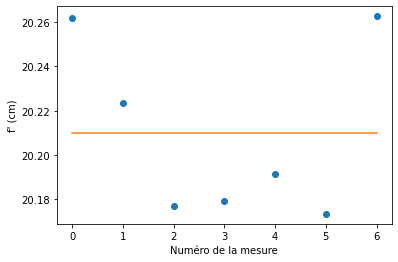

In [2]:
plt.plot(t_foc, 'o') # représentation des valeurs obtenues
plt.plot( (0,np.size(t_d_obj)-1),(f_moy,f_moy) ) # tracé de droite représentant la valeur moyenne
plt.xlabel("Numéro de la mesure")
plt.ylabel("f' (cm)")
plt.show() # affichage de la figure

# Vérification de chaque mesure
Vos points expérimentaux sont-ils compatibles avec la valeur de f' déterminée précédement ? Le graphique précédent n'est pas suffisant pour l'affirmer. Lancez le code dans la cellule ci-dessous :

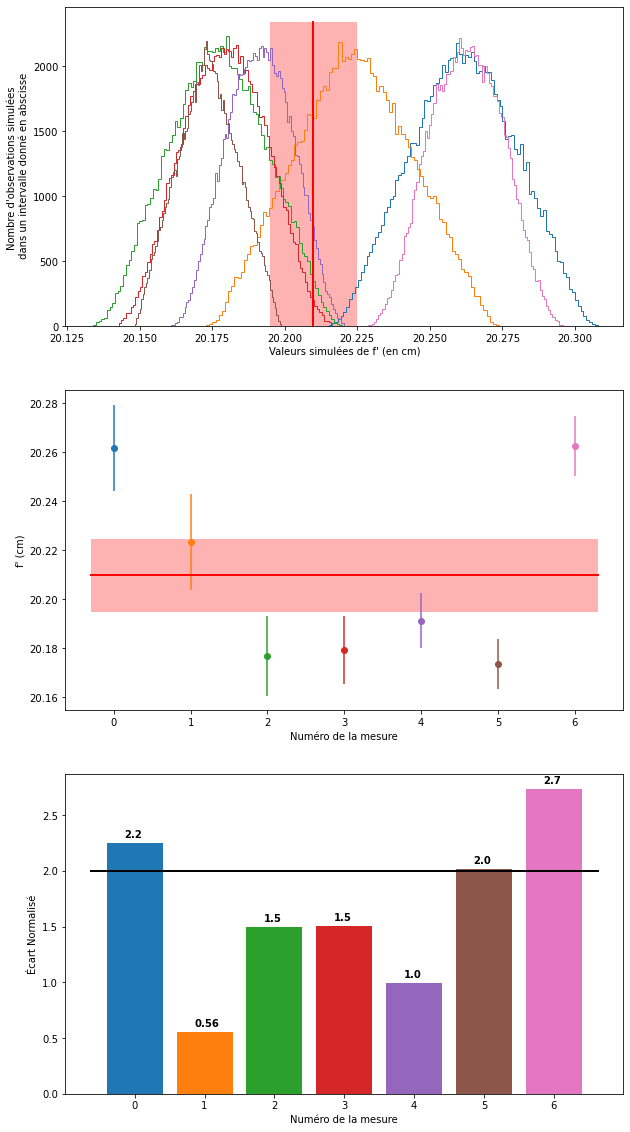

In [7]:
N_sim = 100000 # nombre de simulations

# Mise en place de la figure
plt.figure(figsize=(10,20))
ax1 = plt.subplot(3,1,1)
ax2 = plt.subplot(3,1,2)
ax3 = plt.subplot(3,1,3)

# Construction des données à afficher
for i, (d_obj, d_ima) in enumerate(zip(t_d_obj, t_d_ima)):
    
    t_p_lent_MC = 0 + rd.uniform(-0.05, 0.05,N_sim) # simulation de la position de la lentille
    t_p_obj_MC = d_obj + rd.uniform(-0.05, 0.05,N_sim) # simulation de la position de l'objet
    t_p_ima_MC = d_ima + rd.uniform(-0.25, 0.25,N_sim) # simulation de la position l'écran (image nette sur 0.5 cm)
    t_f_MC = 1 / (1/(t_p_ima_MC-t_p_lent_MC)-1/(t_p_obj_MC-t_p_lent_MC)) # calcul de la distance focale
    num, bins, patches = ax1.hist(t_f_MC, histtype='step', bins='rice') # trace l’histogramme avec un nombre de classes optimalplt.plot((f_val,f_val), (0,300)) # tracé de la valeur mesurée (sur la base des 7 obs.)
    fmoy_MC = np.mean(t_f_MC) # valeur de la distance focale moyenne des observations simulées 
    uf_MC = np.std(t_f_MC,ddof=1) # valeur de l'incertitude-type sur une seule observation de la distance focale
    EN = np.abs(fmoy_MC-f_moy)/np.sqrt(uf_MC**2+uf_moy**2) # écart normalisé
    ax2.errorbar(i, fmoy_MC, uf_MC, 0, 'o')
    ax3.bar(i,EN)
    ax3.text(i-0.15, EN+0.05, "{:.2}".format(EN), fontweight='bold')

# Réglage des axes des figures et des valeurs spécifiques à afficher 
ax1_ymin, ax1_ymax = ax1.get_ylim()
ax1.plot((f_moy,f_moy), (ax1_ymin,ax1_ymax), linewidth = 2, color ='red' ) 
ax1.add_patch(Rectangle((f_moy-uf_moy, ax1_ymin), 2*uf_moy, ax1_ymax-ax1_ymin, facecolor='red', alpha=0.3))
ax1.set_ylabel("Nombre d'observations simulées \n dans un intervalle donné en abscisse")
ax1.set_xlabel("Valeurs simulées de f' (en cm)")

ax2_xmin, ax2_xmax = ax2.get_xlim()
ax2.plot((ax2_xmin,ax2_xmax), (f_moy,f_moy), linewidth = 2, color ='red')
ax2.add_patch(Rectangle((ax2_xmin, f_moy-uf_moy), ax2_xmax-ax2_xmin, 2*uf_moy, facecolor='red', alpha=0.3))
ax2.set_xlabel("Numéro de la mesure")
ax2.set_ylabel("f' (cm)")

ax3_xmin, ax3_xmax = ax2.get_xlim()
ax3.plot((ax3_xmin,ax3_xmax), (2,2), linewidth = 2, color ='black')
ax3.set_xlabel("Numéro de la mesure")
ax3.set_ylabel("Écart Normalisé")

# Affiche la figure
plt.show() 


### Comprendre les résultats affichés

Trois graphiques s'affichent lorsque vous executez le code de la cellule précédente :
+ Le premier représente les valeurs simulées de la distance focale à partir de chacunes de vos observations. Chaque histogramme correspond à des observations simulées à partir d'un seul des couples distance objet-lentille / distance image-lentille que vous avez observés. L'incertitude associée à ces mesures est supposé être celui d'une règle graduée tous les milimètres. Remarquez que les distributions (d'après l'allure des histogrammes) ne sont pas "gaussiennes" (autre noms pour "gaussiennes" *physique* : "loi de distribution normale" *mathématiques*, "courbe en cloche" *vulgaire*) mais on des formes de trapèzes ! Le trait rouge représente la valeur moyenne de la distance focale à partir de vos valeurs et la zone rouge semi-transparente correspond à la distance focale moyenne plus ou moins l'incertitude-type de la distance focale moyenne (associés à **l'ensemble** de vos observations). 
+ Le deuxième graphique contient l'essentiel du premier graphique, à savoir la moyenne et l'écart-type calculés à partir de chaque histogramme : un point représente la valeur moyenne d'un histogramme et la taille de la barre représente deux fois la valeur de l'écart type (un écart-type au dessus du point, un écart-type en dessous). Cette représentation est plus lisible que la première et est admise par la communauté des physiciens. Le trait rouge représente la valeur moyenne de la distance focale à partir de vos valeurs et la zone rouge semi-transparente correspond à la distance focale moyenne plus ou moins l'incertitude-type de la distance focale moyenne (associés à **l'ensemble** de vos observations). 
+ Le troisième graphique représente la valeur de l'écart normalisé (ou z-score) de chaque mesure par rapport à la mesure de la distance focale moyenne. Le trait noir correspond à la valeur de 2 qui par convention sépare les observations incompatibles des observations compatibles. 


### À vous de jouer


> Repérez les observations qui sont incompatibles avec votre mesure de la distance focale moyenne. 

Une observation incompatible avec votre mesure de la distance focale moyenne est dûe à trois raisons qui ne s'excluent pas entre elles : 
+ L'observation correspond à **une mauvaise manipulation** (mauvaise estimation des distances, l'image de l'objet à travers la lentille était floue lorsque vous avez mesuré les distances, etc.), il faut la réitérer dans des conditions similaires.
+ Le modèle qui permet de calculer la distance focale, à partir d'un couple distance objet-lentille / distance image-lentille, est erroné pour cette observation. Ce cas de figure se rencontre lorsque les hypothèses nécessaires pour pouvoir appliquer le modèle ne sont pas réunies : **le modèle est utilisé hors de son domaine d'application**. C'est le cas lorsque l'objet et l'image ne sont pas sur l'axe optique de la lentille, lorsque l'objet ou l'image est trop proche de la lentille (effet qui empire si c'est la face bombée qui est trop proche de l'objet ou l'image) ou lorsque la lentille a une distance focale trop faible. Les conditions d'utilisation de la formule de Descartes (c'est le modèle qui est utilisé ici pour calculer la distance focale) nécessite en effet que les lentilles soient *minces* et utilisées dans les *conditions de Gauss*.    
+ L'observation est en fait correcte mais **les incertitudes ont été sous-estimées**.

> Réflechissez aux trois raisons : est-ce une mauvaise manipulation de votre part ? Est-ce une erreur dans l'application du modèle ? Est-ce que, d'un point de vue expérimental, l'incertitude-type de la distance mesurée entre l'objet et la lentille ou l'image et la lentille se réduit à une incertitude-type de lecture de la règle graduée présente sur le banc d'optique ? Si non, comment prendre en compte d'autres sources d'incertitudes et quelles sont-elles ?   
